## Market Comparison of Option Pricing Models

In this notebook, we will compare theoretical option prices generated by the Black-Scholes model to real market option prices using real data from Yahoo Finance. This allows us to explore pricing discrepancies, evaluate the validity of risk-neutral assumptions, and visualize implied volatility patterns.

In [4]:
import sys
sys.path.append("../models")

import matplotlib.pyplot as plt
import yfinance as yf
from black_scholes import black_scholes_price
from monte_carlo import monte_carlo_price

ticker = 'AAPL'
stock = yf.Ticker(ticker)

# select options expiry date
expiry = stock.options[0]
opt_chain = stock.option_chain(expiry)
calls = opt_chain.calls
puts = opt_chain.puts

# show call option contracts
print(calls.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL250725C00110000 2025-07-17 19:37:42+00:00   110.0     101.07  100.70   
1  AAPL250725C00120000 2025-06-27 17:42:44+00:00   120.0      81.97   90.70   
2  AAPL250725C00125000 2025-07-17 14:34:08+00:00   125.0      85.20   85.70   
3  AAPL250725C00135000 2025-06-23 17:28:40+00:00   135.0      67.00   75.65   
4  AAPL250725C00140000 2025-07-17 19:59:27+00:00   140.0      70.15   70.80   

      ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  102.05    0.00       0.000000    27.0            51           2.107427   
1   92.10    0.00       0.000000     5.0             5           1.882813   
2   87.15    0.00       0.000000    10.0             1           1.787110   
3   77.15    0.00       0.000000     2.0             1           1.527346   
4   71.75   -0.18      -0.255937     1.0            10           1.261722   

   inTheMoney contractSize currency  
0        True      REGUL

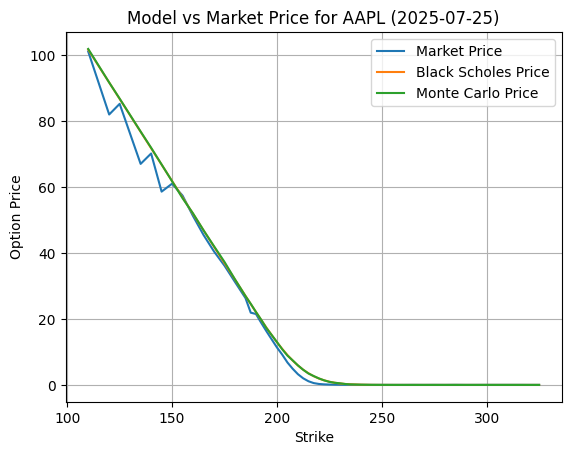

In [5]:
S = stock.history(period="1d")["Close"].iloc[-1]
r = 0.05
T = 30 / 365
sigma = 0.2

# calculate black scholes price, monte carlo for different strike prices
calls['bs_price'] = calls['strike'].apply(lambda K: black_scholes_price(S, K, T, r, sigma))
calls['mc_price'] = calls['strike'].apply(lambda K: monte_carlo_price(S, K, T, r, sigma))

# plot actual price vs black scholes
plt.plot(calls['strike'], calls['lastPrice'], label='Market Price')
plt.plot(calls['strike'], calls['bs_price'], label='Black Scholes Price')
plt.plot(calls['strike'], calls['mc_price'], label='Monte Carlo Price')
plt.xlabel("Strike")
plt.ylabel("Option Price")
plt.title(f"Model vs Market Price for {ticker} ({expiry})")
plt.legend()
plt.grid()
plt.show()